# Data Science Task 1: Iris Flower classification

## Problem statement
Iris flower has three species (setotsa, versicolor, and virginica) that can be distiguished by their respective petal and sepal dimensions, length and width. The task is to train a machine learning model that can classify iris species based on their sepal and petal dimensions.

# Step 1: Import required libaries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2: Loading The Dataset 
## The dataset is loaded into pandas dataframe to allow for EDA

In [2]:
# uploading file 
directory_path = r"C:\Users\Kabelo\Documents\Minds\Oasis Infobyte\Oasis Infobyte Projects\Task 1"
file_path = os.path.join(directory_path, "iris.csv")
iris_df = pd.read_csv(file_path)
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


**To get idea of the number of columns (independent variables and output variables) the dataset contains, i used the head() method. which display the first 5 rows with columns.**


# Exploratory Data Analysis
## The critical step in data analysis/science framework
NOTE: EDA (Exploratory Data Analysis) is a critical step that helps one to:

- **Understand Data:** know the distribution, content, and quality of your data.
- **Clean data:** EDA helps to detect missing values, outliers, anomalies, and data redundancies.
- **Analyze the relationships and patterns in the data:** To uncover trends and associations between variables will help guiding our analysis and have initial hypotheses before deep diving into model building.


In [3]:
# determing the total samples collected per species
print(iris_df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [4]:
# Removing data redudancey = Id column 
iris_df.drop('Id', axis=1, inplace=True)
# looking for concise summary of data frame
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Note: The **'Id'** column is removed beacuse is redundant and the output shows that we have **150 rows and there is no missing values in all columns (150 non-null)**

In [5]:
# descriptive statistics 
print(iris_df.describe().T)

               count      mean       std  min  25%   50%  75%  max
SepalLengthCm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidthCm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
PetalLengthCm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
PetalWidthCm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


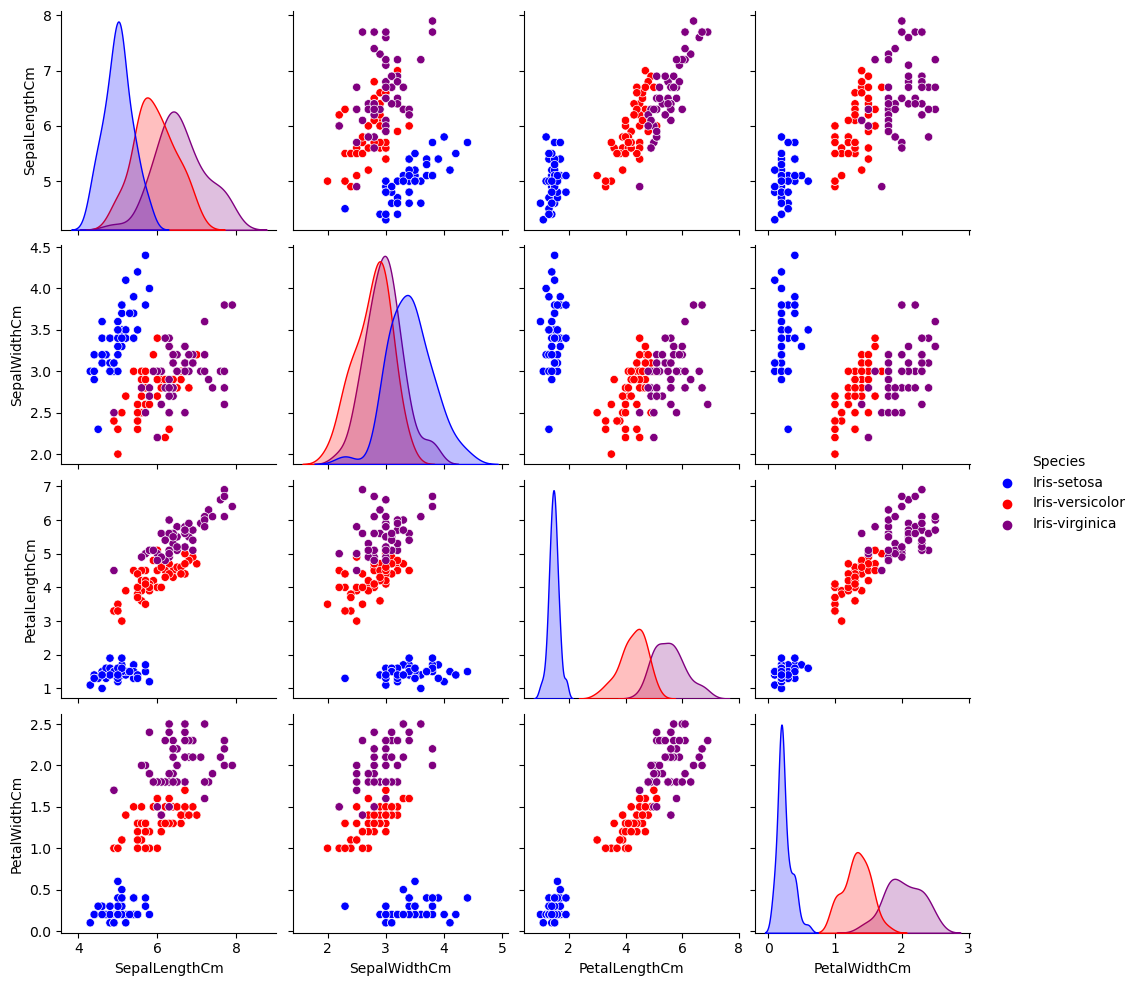

In [6]:
# visualizing the whole dataset
colour_set = {"Iris-setosa":"blue", "Iris-versicolor": "red","Iris-virginica": "purple" } 
sns.pairplot(iris_df, hue = 'Species', palette = colour_set)

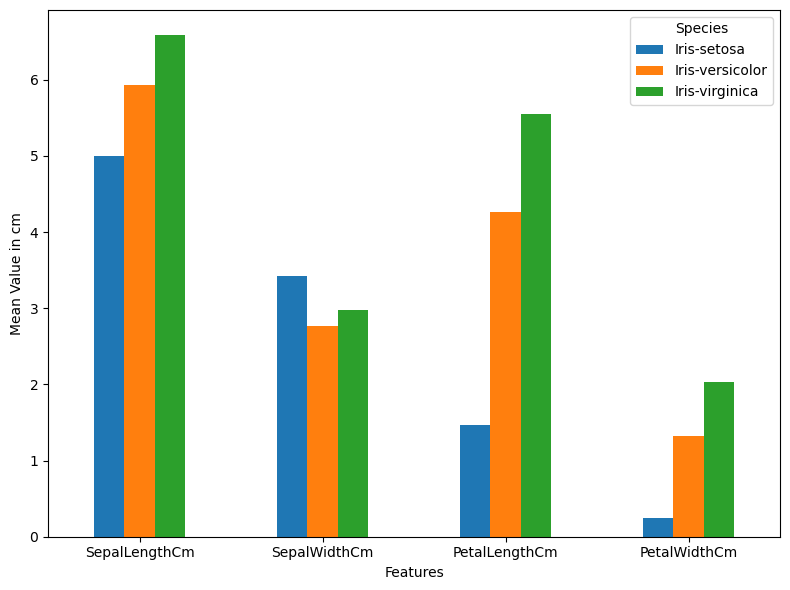

In [7]:
mean_features = iris_df.groupby('Species').mean().T
mean_features.plot(kind='bar', figsize=(8,6))
plt.xlabel('Features')
plt.ylabel('Mean Value in cm')
plt.xticks(rotation=360)
plt.legend(title="Species") 
plt.tight_layout()
plt.show()



- From the pairplot we can clearly see that the Iris-setosa dataset is separated and is the sohortest specie with the Virginica specie being the longest. To Clearly reveal this fact, a bargraph plotted with mean value in cm against features helped to readlity compare these species. 
- The pairplot shows that species virginica and versicolor datapoints are quite overlapping in terms of the sepal dimensions.


# Step 3: Machine Model Training 

## Insert Required Libaries

In [8]:
# Importing all the required scikitlearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Separating variables and scaling the data

In [9]:
# separating the Features and the Target
X = iris_df.drop("Species", axis=1)
y = iris_df['Species']
# spliiting the data into train and test sata 
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state=30)

# standardizing the dataset 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training The Model

In [10]:
# Instantiating and training the model
svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

## Making Predictions

In [11]:
# predicting the specie
y_prediction = svc_model.predict(X_test)
print(y_prediction)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor']


In [12]:
y_test = y_test.to_numpy()
print(y_test)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor']


## Evaluating the Model

In [13]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_prediction))

Accuracy: 0.97
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



**SAVING THE MODEL:**

In [14]:
# Train the whole dataset
svc_model_final = SVC()
svc_model_final.fit(X,y)

# Saving the model
import joblib
joblib.dump(svc_model_final,"Iris_flower_Classifier")


['Iris_flower_Classifier']